In [52]:
import numpy as np
from matplotlib import pyplot

In [53]:
import MNISTtools

In [54]:
xtrain,ltrain= MNISTtools.load(dataset='training', path='C:\\Users\\Sanika\\Desktop\\MLIP\\Assignment 1')


#### Question 1

In [55]:
print(xtrain.shape)    #shape of xtrain (N= 60000)
print(ltrain.shape)    #shape of ltrain


(784, 60000)
(60000,)


In [56]:
print(xtrain.size)     #size of training dataset

47040000


In [57]:
print(xtrain.ndim)

2


#### Question 2 

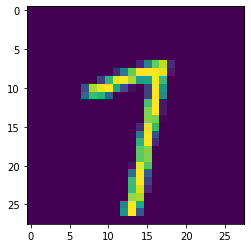

In [58]:
import matplotlib.pyplot as plt



#print(xtrain[:,42])     #print the image array present at 42nd position 

a = np.array(xtrain[:,42])

    
b = np.reshape(a,(28,28))



plt.imshow(b)


In [59]:
a = np.min(xtrain)    #min value of xtrain
print(a)

0


In [60]:
b = np.max(xtrain)  #max value of xtrain 
print(b)


255


#### Question 3

In [61]:
full_range = b-a 
print(full_range)     #range of xtrain


255


In [62]:
t = type(xtrain)       #type of xtrain
print(t)

<class 'numpy.ndarray'>


#### Question 4

    

In [63]:
def normalize_MNIST_images(xtrain):
    
    
    xtrain = xtrain.astype(np.float32)    #convert to float
    xtrain = xtrain / 255                 #divide by maximum value
     
    m = np.max(xtrain)                  #maximum value should be 1
    print(m)
    
    n = np.min(xtrain)                  #minimum value should be 0
    print(n)
    
    xtrain = 2*xtrain
    
    c = np.max(xtrain)                #maximum value should be 2
    print(c)
    
    xtrain = xtrain - 1
    
    d = np.max(xtrain)                  #maximum value should be 1
    print(d)
    
    b = np.min(xtrain)                  #minimum value should be -1
    print(b)
    
    return xtrain
xtrain = normalize_MNIST_images(xtrain)
    
    

1.0
0.0
2.0
1.0
-1.0


#### Question 5

In [64]:
def label2onehot(lbl):
    
    d = np.zeros((lbl.max() + 1, lbl.size))    #10*60000 array created
    d[lbl, np.arange(lbl.size)] = 1         #array indexing
    return d
dtrain = label2onehot(ltrain)
print(dtrain)

print(dtrain[:,42])
print(ltrain[42])

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


#### Question 6

In [65]:
def onehot2label(d):
    
    lbl = d.argmax(axis=0)
    return lbl

ltrain == onehot2label(dtrain)

print(ltrain)





[5 0 4 ... 5 6 8]


#### Question 7

In [66]:
def softmax(a) :
#     print("Max = ",a.max(axis = 0))
#     print("1st sample", a[:,0])
    a=a-a.max(axis=0)
    g = np.exp(a)
    sm = g/np.sum(g, axis=0)
#     print("Minimum activation = ",np.min(sm))
    return sm

#### Question 8

![](IMG_20191016_220145(1).jpg) 

![](IMG_20191016_220214(1).jpg) 

![](IMG_20191016_220222(1).jpg)

#### Question 9 

![](IMG_20191016_220231(1).jpg)

![](IMG_20191016_220239(1).jpg)

#### Question 12 (relu) 

In [67]:
def relu(a1):
    r = np.maximum(a1 , 0)
    return r


#### Question 13

In [68]:
def init_shallow(Ni, Nh, No):
    b1 = np.random.randn(Nh, 1) / np.sqrt((Ni+1.)/2.)
    W1 = np.random.randn(Nh, Ni) / np.sqrt((Ni+1.)/2.)
    b2 = np.random.randn(No, 1) / np.sqrt((Nh+1.)/2)
    W2 = np.random.randn(No, Nh) / np.sqrt((Nh+1.)/2)
    

    return W1, b1, W2, b2

Ni = xtrain.shape[0]
print(Ni)

Nh = 64

No = dtrain.shape[0]
print(No)

netinit = init_shallow(Ni, Nh, No)

784
10


#### Question 14

In [69]:
def forwardprop_shallow(x, net):
    W1 = net[0]
    b1 = net[1]

    W2 = net[2]
    b2 = net[3]
    
    a1 = W1.dot(x) + b1
    
    h1 = relu(a1)
    
    a2 = W2.dot(h1) + b2
    
    y = softmax(a2)
    
    return y


yinit = forwardprop_shallow(xtrain, netinit)



#### Question 15

In [70]:
def eval_loss(y, d):
    e1 = - np.sum(np.log(y)*(d))                      #cross entropy loss
    return e1/y.shape[1]
    
print(eval_loss(yinit, dtrain), 'should be around .26')

2.826977312076303 should be around .26


#### Question 16

In [71]:
def eval_perfs(y, lbl):
    
    yinit = onehot2label(y)
    return 100.0 - np.count_nonzero(yinit == lbl)*100.0/ltrain.shape[0]      #perecentage of misclasified samples
    
print(eval_perfs(yinit, ltrain))

93.435


In [72]:
ltrain.shape[0]


60000

In [73]:
np.count_nonzero(np.array([1,2,3])==np.array([4,2,6]))      #trial example

1

In [74]:
np.array([1,2,3])==np.array([4,2,6])                       #trial example

array([False,  True, False])

#### Question 10 (softmaxp)

In [75]:
def softmaxp(a, e):
    
    p1 = np.multiply(softmax(a),e)
    p2 = np.multiply(p1.sum(axis=0),softmax(a))      #column wise summation
    p3 = p1-p2                                       #final value of delta
    
    return p3



#### Question 12 ( relup)

In [76]:
def relup(a, e):
    
    l1 = relu(a)
    
    l1[l1 > 0] = 1    #slope of all elements greater than zero will be one since its the line y=x
    
    l2 = np.multiply(l1,e)
    
    return l2

#### Question 11

In [77]:
eps = 1e-6                          # finite difference step
a = np.random.randn(10, 200)          # random inputs
e = np.random.randn(10, 200)          # random directions

diff = softmaxp(a, e)

diff_approx = (softmax(a + eps*e)- softmax(a))/ eps

rel_error = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()
print(rel_error, 'should be smaller than 1e-6')


5.172886967827633e-07 should be smaller than 1e-6


#### Question 17

In [78]:
def update_shallow(x, d, net, gamma=.05):
    
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    
    Ni = W1.shape[1]
    Nh = W1.shape[0]
    No = W2.shape[0]
    
    gamma = gamma / x.shape[1]   # normalized by the training dataset size

    a1 = W1.dot(x) + b1
    
    h1 = relu(a1)
    
    a2 = W2.dot(h1) + b2
    
    y = softmax(a2)
    
    e = -d/y
    
    delta2 =  softmaxp( a2 ,  e)
    delta1 = relup ( a1 , W2 .T. dot ( delta2 ))
    
    # gradient update
        
    W2 = W2 - gamma * delta2 . dot ( h1 .T)
    #print(W2)
    W1 = W1 - gamma * delta1 . dot (x .T)
    #print(W1)
    b2 = b2 - gamma * delta2 .sum( axis =1 , keepdims = True )
    b1 = b1 - gamma * delta1 .sum( axis =1 , keepdims = True )

    return W1, b1, W2, b2


#### Question 18

In [79]:
def backprop_shallow(x, d, net, T, gamma=.05):
    lbl = onehot2label(d)
    while (T>0):
        
        #print(net)
        net = update_shallow(x, d, net)
        
        #print(net)
        y = forwardprop_shallow(x,net)
        
        
        loss = eval_loss(y,d)
        
        print("Loss:" ,loss)
        
        perfs = eval_perfs(y,lbl)
        
        print("Performance :" ,perfs)
        
        T = T - 1
        
    return net

In [80]:
nettrain = backprop_shallow(xtrain, dtrain, netinit, 5)

Loss: 2.425741842792139
Performance : 82.11666666666667
Loss: 2.2706456891395863
Performance : 78.20666666666666
Loss: 2.0392056790628104
Performance : 69.86166666666666
Loss: 1.92374225681241
Performance : 67.425
Loss: 1.8579724122589942
Performance : 61.93


In [82]:
nettrain = backprop_shallow(xtrain, dtrain, netinit, 100)

Loss: 2.425741842792139
Performance : 82.11666666666667
Loss: 2.2706456891395863
Performance : 78.20666666666666
Loss: 2.0392056790628104
Performance : 69.86166666666666
Loss: 1.92374225681241
Performance : 67.425
Loss: 1.8579724122589942
Performance : 61.93
Loss: 1.814169049771184
Performance : 67.50833333333333
Loss: 1.8166375800198205
Performance : 65.44666666666666
Loss: 1.7705033468220113
Performance : 65.87
Loss: 1.6934883446274482
Performance : 58.775
Loss: 1.5525653017420153
Performance : 50.72666666666667
Loss: 1.488997131678437
Performance : 49.85333333333333
Loss: 1.4843069587387603
Performance : 46.04833333333333
Loss: 1.380619696787515
Performance : 44.501666666666665
Loss: 1.4070022337188859
Performance : 43.96333333333333
Loss: 1.292144873481806
Performance : 42.08166666666666
Loss: 1.3440313074252943
Performance : 43.585
Loss: 1.2312463343828872
Performance : 39.13333333333333
Loss: 1.236308617979657
Performance : 41.22833333333333
Loss: 1.2049613608299021
Performance :

#### Question 19

In [95]:
xtest,ltest= MNISTtools.load(dataset='testing', path='C:\\Users\\Sanika\\Desktop\\MLIP\\Assignment 1')

xtest = normalize_MNIST_images(xtest)

1.0
0.0
2.0
1.0
-1.0


In [84]:
print(xtest.shape)
print(ltest.shape)

(784, 10000)
(10000,)


In [85]:
print(xtest.size)

7840000


In [93]:
dtest = label2onehot(ltest)
ytest = forwardprop_shallow(xtest, nettrain)
loss = eval_loss(ytest,dtest)
print("Loss:" ,loss)
perfs = eval_perfs(ytest,ltest)
print("Performance :" ,perfs)

Loss: 0.4291869284630172
Performance : 85.28999999999999


#### Question 20

In [96]:
def backprop_minibatch_shallow(x, d, net, T, B=100, gamma=.05):
    
    N = x.shape[1]

    NB = int((N+B-1)/B)            #no of samples + batch size 

    lbl = onehot2label(d)
    for t in range(T):
        shuffled_indices = np.random.permutation(range(N))
        for l in range(NB):
            start = B*l
            if B * (l + 1)> N:
                end = N
            else:
                end = B *(l+1)
            minibatch_indices = shuffled_indices[start:end]
            net = update_shallow(x[:,minibatch_indices], d[:,minibatch_indices], net)
        

        y = forwardprop_shallow(x, net)

        loss = eval_loss(y,d)

        print("Loss:" ,loss)

        perfs = eval_perfs(y,lbl)

        print("Performance :" ,perfs)

    return net


In [97]:
netbatch =  backprop_minibatch_shallow(xtrain, dtrain, netinit, 5)

Loss: 0.2711271227071919
Performance : 7.846666666666664
Loss: 0.22923723774828036
Performance : 6.644999999999996
Loss: 0.18004849543880985
Performance : 5.266666666666666
Loss: 0.1535280260856061
Performance : 4.38333333333334
Loss: 0.1489401660930424
Performance : 4.204999999999998


In [98]:
dtest = label2onehot(ltest)
ytest = forwardprop_shallow(xtest, netbatch)
loss = eval_loss(ytest,dtest)
print("Loss:" ,loss)
perfs = eval_perfs(ytest,ltest)
print("Performance :" ,perfs)

Loss: 0.1616315594934502
Performance : 84.09666666666666
